# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)


colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


## Variáveis categóricas


## Correlação entre variáveis

A correlação é uma medida estatística que indica a relação entre duas variáveis. A correlação pode ser positiva, negativa ou neutra. Quando a correlação é positiva, significa que as variáveis possuem uma relação direta. Quando uma variável aumenta, a outra também aumenta. Quando a correlação é negativa, significa que as variáveis possuem uma relação inversa. Quando uma variável aumenta, a outra diminui. Quando a correlação é neutra, significa que as variáveis não possuem relação entre si.

Os valores da correlação variam entre -1 e 1. Quando a correlação é -1, significa que as variáveis possuem uma correlação negativa perfeita. Quando a correlação é 1, significa que as variáveis possuem uma correlação positiva perfeita. Quando a correlação é 0, significa que as variáveis não possuem correlação. Quanto mais próximo de 1 ou -1, mais forte é a correlação. Quanto mais próximo de 0, mais fraca é a correlação.


In [3]:
df_churn.corr(numeric_only=True)

,meses_na_empresa,valor_mensal,total_gasto
meses_na_empresa,1.000000,0.247900,0.825464
valor_mensal,0.247900,1.000000,0.650864
total_gasto,0.825464,0.650864,1.000000


In [ ]:
df_churn['churn'] = df_churn['churn'].replace({'Sim': 1, 'Não': 0})
display(df_churn['churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [6]:
df_dummies = pd.get_dummies(df_churn)
display(df_dummies.head())

,meses_na_empresa,valor_mensal,total_gasto,churn,genero_Feminino,genero_Masculino,idoso_Não,idoso_Sim,tem_parceiro_Não,tem_parceiro_Sim,...,streaming_filmes_Sim,contrato_Anual,contrato_Bianual,contrato_Mensal,fatura_digital_Não,fatura_digital_Sim,forma_pagamento_Boleto,forma_pagamento_Cartao de credito,forma_pagamento_Cheque,forma_pagamento_Transferencia
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,False,False,True,False,True,True,False,False,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


In [7]:
df_dummies.corr()

,meses_na_empresa,valor_mensal,total_gasto,churn,genero_Feminino,genero_Masculino,idoso_Não,idoso_Sim,tem_parceiro_Não,tem_parceiro_Sim,...,streaming_filmes_Sim,contrato_Anual,contrato_Bianual,contrato_Mensal,fatura_digital_Não,fatura_digital_Sim,forma_pagamento_Boleto,forma_pagamento_Cartao de credito,forma_pagamento_Cheque,forma_pagamento_Transferencia
meses_na_empresa,1.000000,0.247900,0.825464,-0.352229,-0.005106,0.005106,-0.016567,0.016567,-0.379697,0.379697,...,0.286111,0.202570,0.558533,-0.645561,-0.006152,0.006152,-0.208363,0.233006,-0.233852,0.243510
valor_mensal,0.247900,1.000000,0.650864,0.193356,0.014569,-0.014569,-0.220173,0.220173,-0.096848,0.096848,...,0.627429,0.004904,-0.074681,0.060165,-0.352150,0.352150,0.271625,0.030550,-0.377437,0.042812
total_gasto,0.825464,0.650864,1.000000,-0.199037,0.000002,-0.000002,-0.102652,0.102652,-0.318364,0.318364,...,0.519884,0.170649,0.356226,-0.445619,-0.158055,0.158055,-0.059971,0.182745,-0.294814,0.186025
churn,-0.352229,0.193356,-0.199037,1.000000,0.008612,-0.008612,-0.150889,0.150889,0.150448,-0.150448,...,0.061382,-0.177820,-0.302253,0.405103,-0.191825,0.191825,0.301919,-0.134302,-0.091683,-0.117937
genero_Feminino,-0.005106,0.014569,0.000002,0.008612,1.000000,-1.000000,-0.001874,0.001874,-0.001808,0.001808,...,0.010487,-0.008026,0.003695,0.003386,-0.011754,0.011754,-0.000752,-0.001215,-0.013744,0.016024
genero_Masculino,0.005106,-0.014569,-0.000002,-0.008612,-1.000000,1.000000,0.001874,-0.001874,0.001808,-0.001808,...,-0.010487,0.008026,-0.003695,-0.003386,0.011754,-0.011754,0.000752,0.001215,0.013744,-0.016024
idoso_Não,-0.016567,-0.220173,-0.102652,-0.150889,-0.001874,0.001874,1.000000,-1.000000,0.016479,-0.016479,...,-0.120176,0.046262,0.117000,-0.138360,0.156530,-0.156530,-0.171718,0.024135,0.153477,0.016159
idoso_Sim,0.016567,0.220173,0.102652,0.150889,0.001874,-0.001874,-1.000000,1.000000,-0.016479,0.016479,...,0.120176,-0.046262,-0.117000,0.138360,-0.156530,0.156530,0.171718,-0.024135,-0.153477,-0.016159
tem_parceiro_Não,-0.379697,-0.096848,-0.318364,0.150448,-0.001808,0.001808,0.016479,-0.016479,1.000000,-1.000000,...,-0.117412,-0.082783,-0.248091,0.280865,-0.014877,0.014877,0.083852,-0.082029,0.095125,-0.110706
tem_parceiro_Sim,0.379697,0.096848,0.318364,-0.150448,0.001808,-0.001808,-0.016479,0.016479,-1.000000,1.000000,...,0.117412,0.082783,0.248091,-0.280865,0.014877,-0.014877,-0.083852,0.082029,-0.095125,0.110706


In [12]:
churn_corr = df_dummies.corr()['churn'].sort_values(ascending=False)
print(churn_corr)


churn                                1.000000
contrato_Mensal                      0.405103
servico_internet_Fibra optica        0.308020
forma_pagamento_Boleto               0.301919
valor_mensal                         0.193356
fatura_digital_Sim                   0.191825
servico_seguranca_Não                0.171226
servico_suporte_tecnico_Não          0.164674
tem_dependentes_Não                  0.164221
idoso_Sim                            0.150889
tem_parceiro_Não                     0.150448
servico_backup_Não                   0.082255
servico_protecao_equipamento_Não     0.066160
streaming_tv_Sim                     0.063228
streaming_filmes_Sim                 0.061382
multiplas_linhas_Sim                 0.040102
servico_telefone_Sim                 0.011942
genero_Feminino                      0.008612
genero_Masculino                    -0.008612
servico_telefone_Não                -0.011942
multiplas_linhas_Não                -0.040102
streaming_filmes_Não              

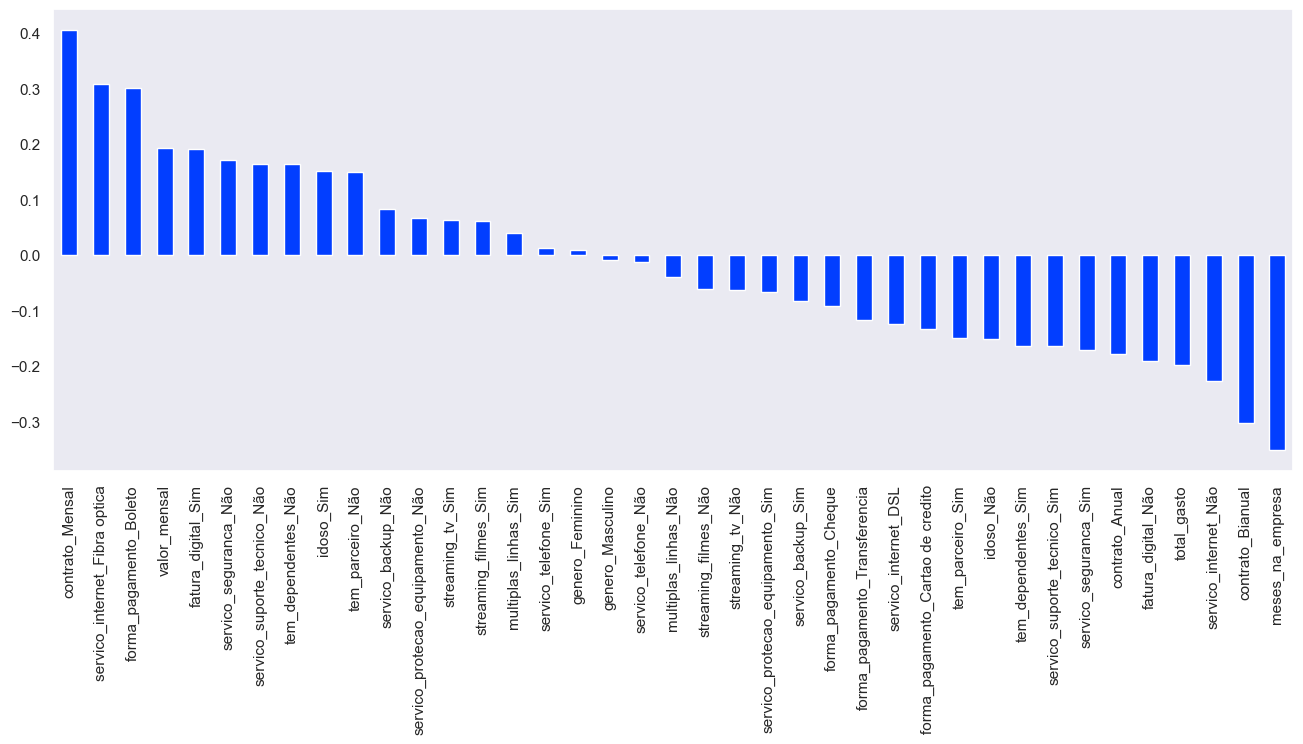

In [19]:

churn_corr[1:].plot(kind='bar', figsize=(16, 6));

C:\Users\Pichau\AppData\Local\Temp\ipykernel_20420\775101990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=churn_corr[1:].index , y=churn_corr[1:].values, palette='coolwarm', ax=ax);


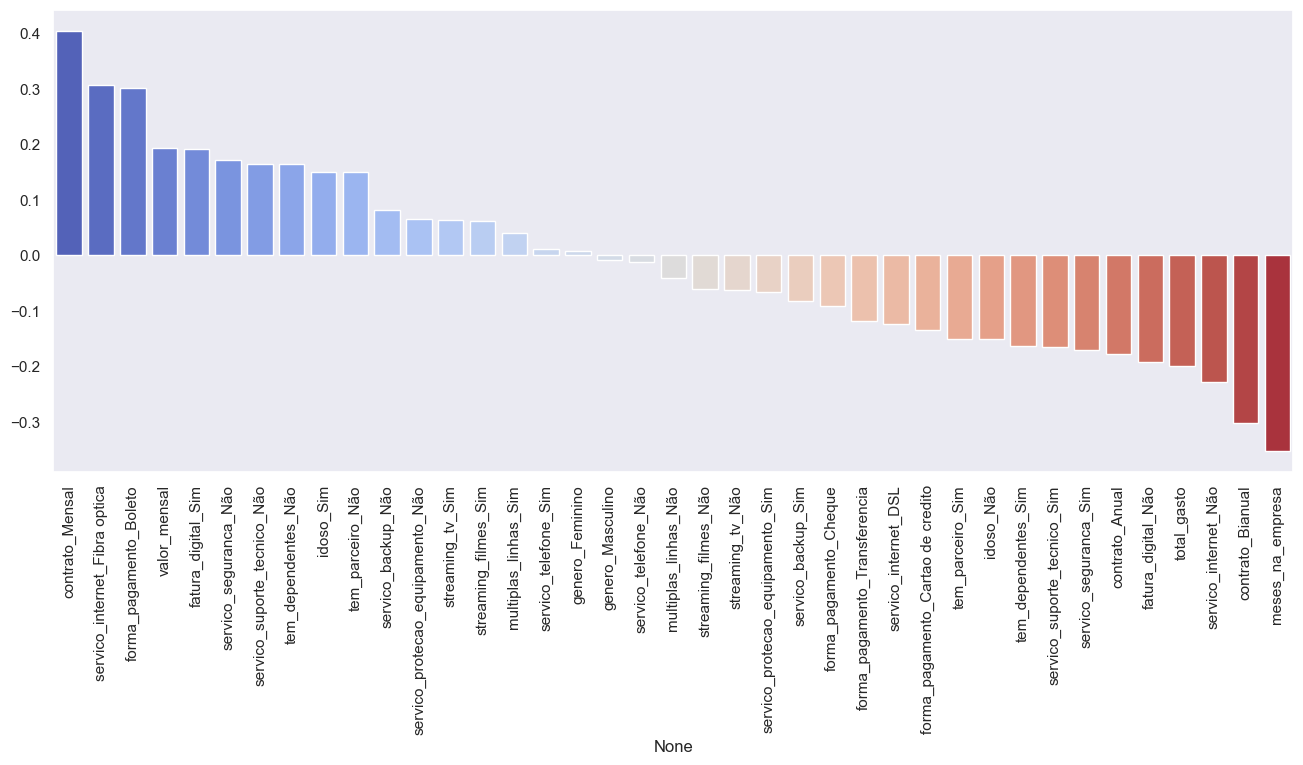

In [33]:
fig, ax = plt.subplots(figsize=(16,6))

b = sns.barplot(x=churn_corr[1:].index , y=churn_corr[1:].values, palette='coolwarm', ax=ax);

b.tick_params(axis='x',rotation=90)

plt.show()